2024-09-10 21:09:32.021287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 21:09:32.040230: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 21:09:32.046109: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 19535 images belonging to 2 classes.
Found 4188 images belonging to 2 classes.
Found 4188 images belonging to 2 classes.


I0000 00:00:1725995377.873539    3657 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725995377.892880    3657 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725995377.892948    3657 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725995377.894144    3657 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725995377.894190    3657 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

  2/262 ━━━━━━━━━━━━━━━━━━━━ 33s 128ms/step  

I0000 00:00:1725995395.719261    3744 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


261/262 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step

2024-09-10 21:10:38.056024: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.31GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-10 21:10:38.056177: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.31GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-10 21:10:39.248816: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-10 21:10:46.339680: W external/local_tsl/tsl/framework/bfc_

262/262 ━━━━━━━━━━━━━━━━━━━━ 66s 200ms/step
262/262 ━━━━━━━━━━━━━━━━━━━━ 46s 166ms/step - accuracy: 0.9661 - auc: 0.5010 - loss: 0.1028 - precision: 0.4527 - recall: 0.4778
Test Accuracy: 0.9570
Test Loss: 0.1253
Test AUC: 0.9896
Test Precision: 0.9719
Test Recall: 0.9412
262/262 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - accuracy: 0.9380 - auc: 0.9873 - loss: 0.1490 - precision: 0.9502 - recall: 0.9246
Val Accuracy: 0.9425
Val Loss: 0.1464
Val AUC: 0.9869
Val Precision: 0.9557
Val Recall: 0.9279


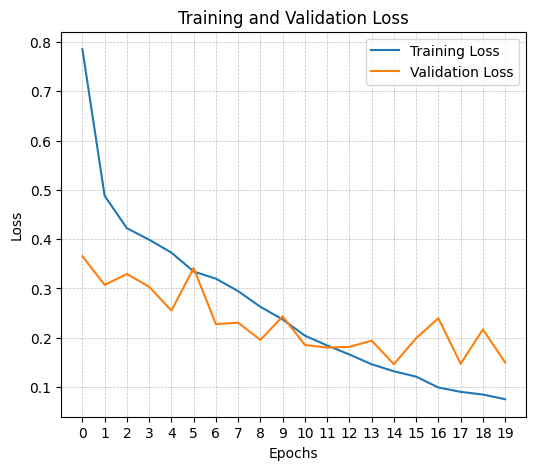

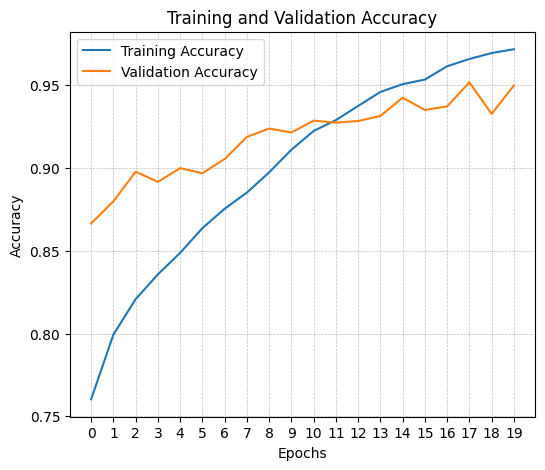

Finished creating Training_Validation_Loss.png and Training_Validation_Accuracy.png
Finished creating Confusion_Matrix
Finished creating ROC_Curve
Finished creating Precision-Recall_Curve


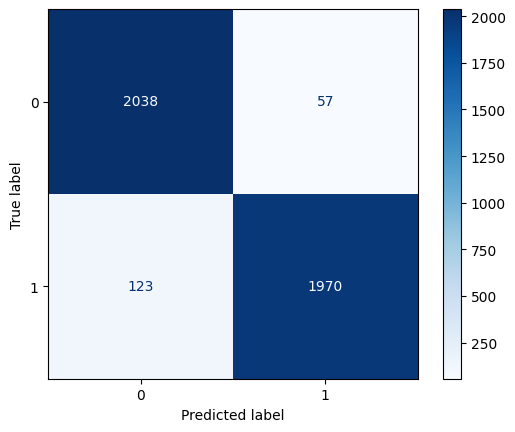

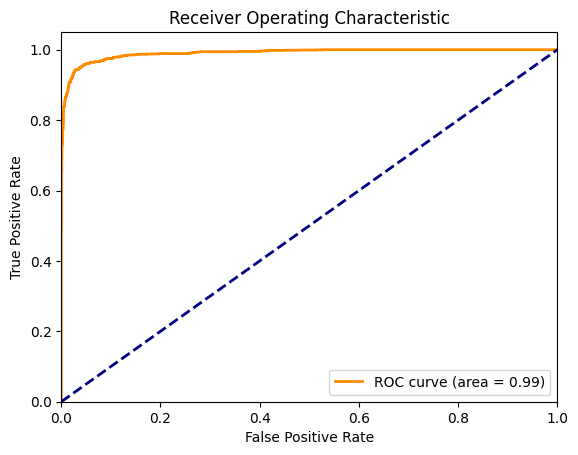

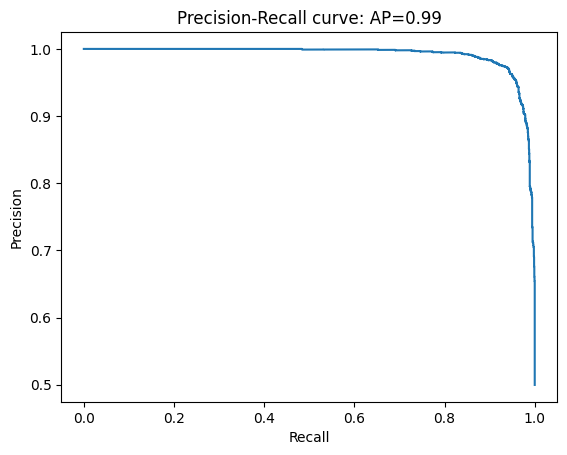

In [1]:
import os
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import AUC, Precision, Recall
from IPython.display import Image, display
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc, precision_recall_curve,
                             average_precision_score)
from tensorflow.keras.layers import (Input, Conv2D, SeparableConv2D, MaxPooling2D,
                                     BatchNormalization, Flatten, Dense, Dropout)

batch_size = 16
nb_epochs = 20

train_path = 'MERGED_ALL_CLEAN_balanced_ready/train'
val_path = 'MERGED_ALL_CLEAN_balanced_ready/val'
test_path = 'MERGED_ALL_CLEAN_balanced_ready/test'

datagen = ImageDataGenerator(rescale=1./255)

train_data_gen = datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

valid_data_gen = datagen.flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_data_gen = datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Load the VGG19 model without the top layers
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract weights for the desired layers
vgg_weights = {
    'block1_conv1': vgg19_model.get_layer('block1_conv1').get_weights(),
    'block1_conv2': vgg19_model.get_layer('block1_conv2').get_weights(),
    'block2_conv1': vgg19_model.get_layer('block2_conv1').get_weights(),
    'block2_conv2': vgg19_model.get_layer('block2_conv2').get_weights()
}


def build_model():
    input_img = Input(shape=(224,224,3), name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling2D((2,2), name='pool1')(x)
    x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv2_1')(x)
    x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = MaxPooling2D((2,2), name='pool3')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', name='fc1')(x)
    x = Dropout(0.7, name='dropout1')(x)
    x = Dense(256, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(1, activation='sigmoid', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

custom_model = build_model()

VGG_conv1_weights = vgg_weights['block1_conv1']
VGG_conv2_weights = vgg_weights['block1_conv2']
VGG_conv4_weights = vgg_weights['block2_conv1']
VGG_conv5_weights = vgg_weights['block2_conv2']

custom_model.get_layer('Conv1_1').set_weights(VGG_conv1_weights)
custom_model.get_layer('Conv1_2').set_weights(VGG_conv2_weights)
custom_model.get_layer('Conv2_1').set_weights(VGG_conv4_weights)
custom_model.get_layer('Conv2_2').set_weights(VGG_conv5_weights)

custom_model.get_layer('Conv1_1').trainable = False
custom_model.get_layer('Conv1_2').trainable = False
custom_model.get_layer('Conv2_1').trainable = False
custom_model.get_layer('Conv2_2').trainable = False

opt = Adam(learning_rate=0.0001)
es = EarlyStopping(patience=2, restore_best_weights=True)
chkpt = ModelCheckpoint(filepath='best_model_todate.weights.h5', save_best_only=True, save_weights_only=True, save_freq='epoch')

custom_model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')], 
    optimizer=opt
)

'''
# Train the model
history = custom_model.fit(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=nb_epochs,
    callbacks=[es, chkpt]
)

history_dict = history.history
with open('training_history.json', 'w') as f:
    json.dump(history_dict, f)

'''
custom_model.load_weights('best_model_todate.weights.h5')

test_classes = test_data_gen.classes
y_pred = custom_model.predict(test_data_gen)
y_pred_ravel = y_pred.ravel()

test_loss, test_acc, test_auc, test_precision, test_recall = custom_model.evaluate(test_data_gen)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

val_loss, val_acc, val_auc, val_precision, val_recall = custom_model.evaluate(valid_data_gen)

print(f"Val Accuracy: {val_acc:.4f}")
print(f"Val Loss: {val_loss:.4f}")
print(f"Val AUC: {val_auc:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

with open('training_history.json', 'r') as f:
    history_dict = json.load(f)

tick_positions = np.arange(0, len(history_dict['loss']), step=1)

plt.figure(figsize=(6, 5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(ticks=tick_positions)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('Training_Validation_Loss.png', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(6, 5))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(ticks=tick_positions)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('Training_Validation_Accuracy.png', bbox_inches='tight')
plt.show()
plt.close()

print("Finished creating Training_Validation_Loss.png and Training_Validation_Accuracy.png")

y_pred = (y_pred_ravel > 0.5).astype(int)

cm = confusion_matrix(test_classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.savefig('Confusion_Matrix.png', bbox_inches='tight')
print("Finished creating Confusion_Matrix")

fpr, tpr, _ = roc_curve(test_classes, y_pred_ravel)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curve.png', bbox_inches='tight')

print("Finished creating ROC_Curve")

precision, recall, _ = precision_recall_curve(test_classes, y_pred_ravel)
average_precision = average_precision_score(test_classes, y_pred_ravel)

plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.savefig('Precision-Recall_Curve.png', bbox_inches='tight')
print("Finished creating Precision-Recall_Curve")

def collect_all_predictions(test_data_gen, model):
    test_data_gen.shuffle = False
    num_samples = test_data_gen.samples
    num_classes = model.output_shape[-1]
    all_preds = np.zeros((num_samples, num_classes), dtype=np.float32)
    all_labels = np.zeros((num_samples,) + test_data_gen.labels.shape[1:], dtype=np.float32)
    all_images = np.zeros((num_samples,) + test_data_gen.image_shape, dtype=np.float32)
    all_preds = y_pred
    i = 0
    for batch_images, batch_labels in test_data_gen:
        batch_size = batch_images.shape[0]
        if i + batch_size > num_samples:
            batch_size = num_samples - i
        all_labels[i:i+batch_size] = batch_labels[:batch_size]
        all_images[i:i+batch_size] = batch_images[:batch_size]
        i += batch_size
        if i >= num_samples:
            break
    return all_preds, all_labels, all_images

def plot_misclassified_images(test_data_gen, model, num_images_per_type=5):
    y_pred, y_true, all_images = collect_all_predictions(test_data_gen, model)
    y_pred_ravel = y_pred.ravel()
    y_pred_class = (y_pred_ravel > 0.5).astype(int)
    
    false_positives_indices = np.where((y_pred_class == 1) & (y_true == 0))[0]
    false_negatives_indices = np.where((y_pred_class == 0) & (y_true == 1))[0]
    
    fig, axes = plt.subplots(2, num_images_per_type, figsize=(2*num_images_per_type, 6))

    for i, idx in enumerate(false_positives_indices[:num_images_per_type]):
        axes[0, i].imshow(all_images[idx])
        axes[0, i].set_title(f"FP {idx}")
        axes[0, i].axis('off')
    
    for i, idx in enumerate(false_negatives_indices[:num_images_per_type]):
        axes[1, i].imshow(all_images[idx])
        axes[1, i].set_title(f"FN {idx}")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.savefig('Misclassified_Images.png', bbox_inches='tight')
    print("Finished creating Misclassified_Images")


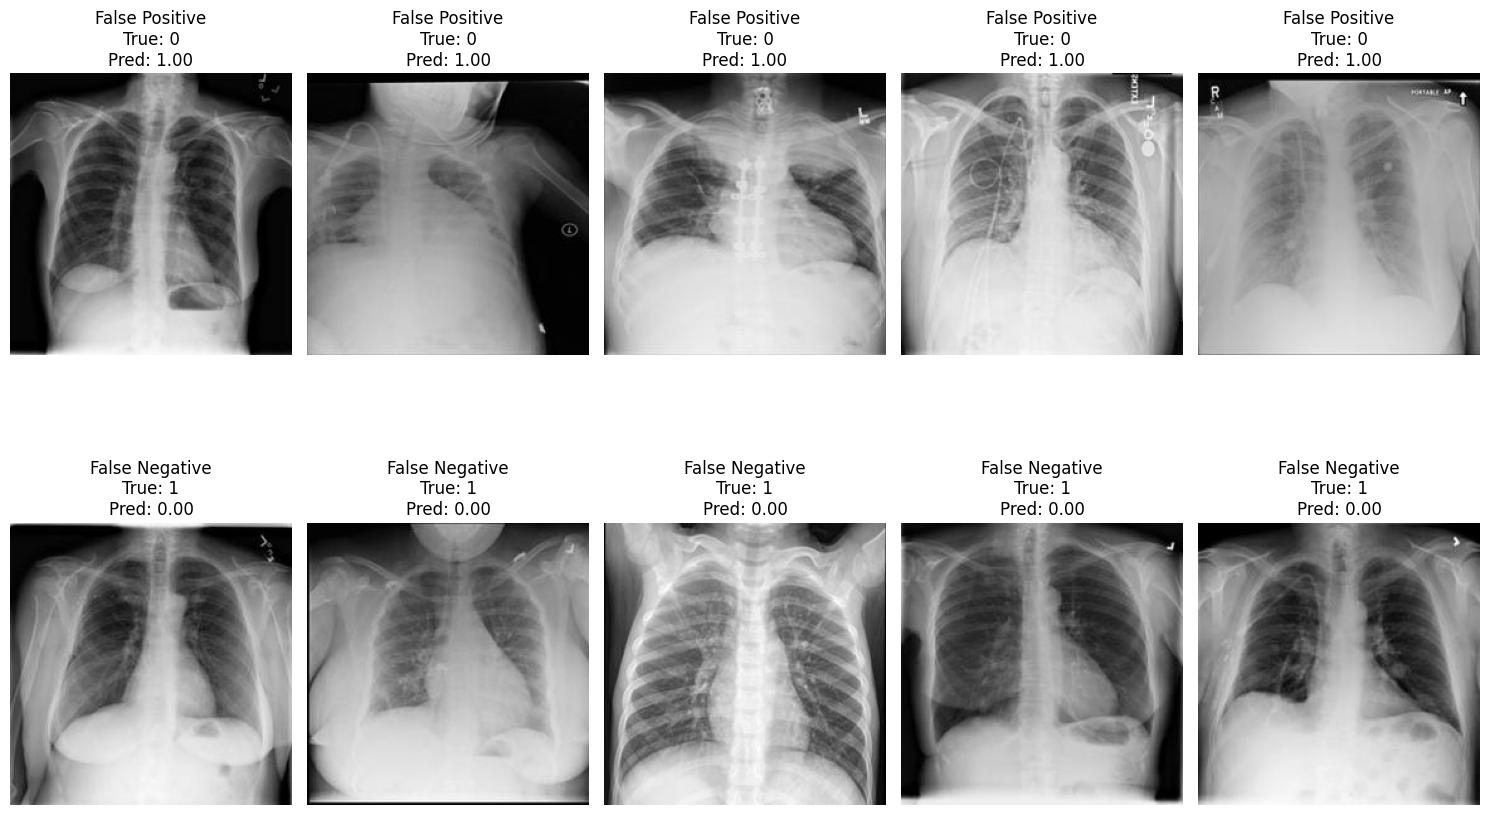

In [2]:
def plot_misclassified_images(test_data_gen, model, num_images_per_type=5):
    y_pred, y_true, all_images = collect_all_predictions(test_data_gen, model)
    y_pred_ravel = y_pred.ravel()
    y_pred_class = (y_pred_ravel > 0.5).astype(int)
    
    false_positives_indices = np.where((y_pred_class == 1) & (y_true == 0))[0]
    false_negatives_indices = np.where((y_pred_class == 0) & (y_true == 1))[0]
    
    num_false_positives = min(num_images_per_type, len(false_positives_indices))
    num_false_negatives = min(num_images_per_type, len(false_negatives_indices))
    
    random_false_positives = np.random.choice(false_positives_indices, num_false_positives, replace=False)
    random_false_negatives = np.random.choice(false_negatives_indices, num_false_negatives, replace=False)
    
    fig, axes = plt.subplots(2, num_images_per_type, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, idx in enumerate(random_false_positives):
        img = (all_images[idx] * 255.0).astype(np.uint8)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'False Positive\nTrue: {y_true[idx]:.0f}\nPred: {y_pred_ravel[idx]:.2f}')
    
    for i, idx in enumerate(random_false_negatives):
        img = (all_images[idx] * 255.0).astype(np.uint8)
        axes[num_images_per_type + i].imshow(img)
        axes[num_images_per_type + i].axis('off')
        axes[num_images_per_type + i].set_title(f'False Negative\nTrue: {y_true[idx]:.0f}\nPred: {y_pred_ravel[idx]:.2f}')
    
    plt.tight_layout()
    plt.savefig('Missclassified_images.png', bbox_inches='tight')
    plt.show()
    
plot_misclassified_images(test_data_gen, custom_model)

In [3]:
custom_model.summary()  

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ ImageInput (InputLayer)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1_1 (Conv2D)                │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1_2 (Conv2D)                │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2_1 (Conv2D)                │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2_2 (Conv2D)                │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3_1 (SeparableConv2D)       │ (None, 56, 56, 128)    │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3_2 (SeparableConv2D)       │ (None, 56, 56, 128)    │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc3 (Dense)                     │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,808,833 (197.64 MB)

 Trainable params: 51,808,321 (197.63 MB)

 Non-trainable params: 512 (2.00 KB)

/home/antek/miniconda3/envs/tf/lib/python3.9/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


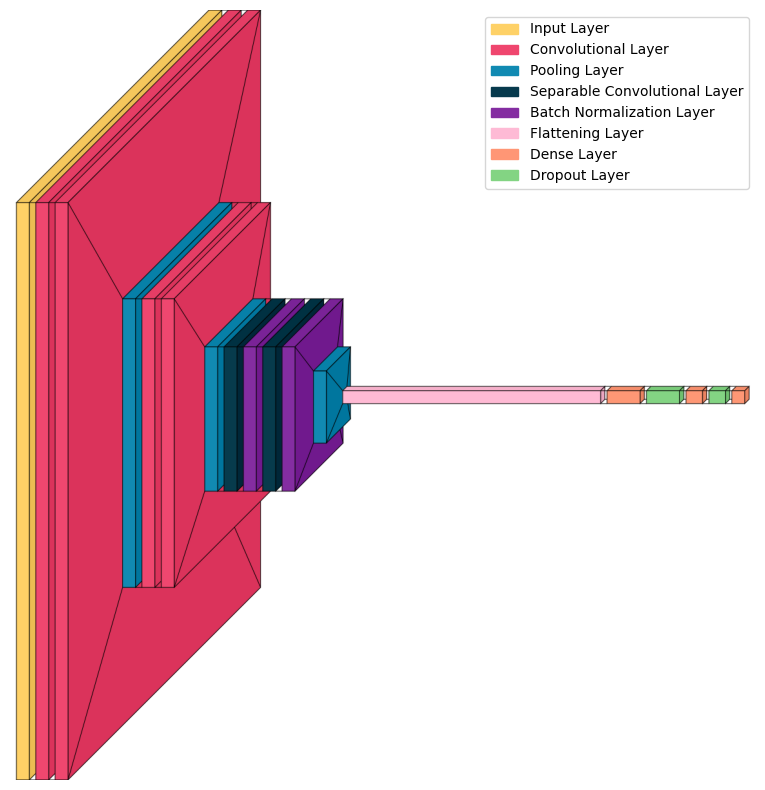

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import visualkeras

img = visualkeras.layered_view(custom_model)
img.save('model_architecture.png')

model_img = Image.open('model_architecture.png')

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(model_img)
ax.axis('off')  

legend_elements = [
    patches.Patch(color='#fed167', label='Input Layer'), 
    patches.Patch(color='#ef466e', label='Convolutional Layer'), 
    patches.Patch(color='#118ab2', label='Pooling Layer'),  
    patches.Patch(color='#073a4d', label='Separable Convolutional Layer'),  
    patches.Patch(color='#842da1', label='Batch Normalization Layer'), 
    patches.Patch(color='#febad5', label='Flattening Layer'),  
    patches.Patch(color='#ff9675', label='Dense Layer'), 
    patches.Patch(color='#83d483', label='Dropout Layer') 
]

plt.legend(handles=legend_elements, loc='upper right')
plt.savefig('model_with_legend.png', bbox_inches='tight')

plt.show()

In [5]:

with open("training_history.json", 'r') as file:
    data = json.load(file)

print(json.dumps(data, indent=4))


{
    "accuracy": [
        0.7603665590286255,
        0.7994266152381897,
        0.8208252191543579,
        0.8357735276222229,
        0.8487765192985535,
        0.8636735677719116,
        0.875396728515625,
        0.885174572467804,
        0.8973584771156311,
        0.9110269546508789,
        0.9223917126655579,
        0.9289444088935852,
        0.937493622303009,
        0.9459404349327087,
        0.950650155544281,
        0.9534145593643188,
        0.9614518284797668,
        0.9658544063568115,
        0.9694378972053528,
        0.9717415571212769
    ],
    "auc": [
        0.8126349449157715,
        0.8607984781265259,
        0.8827500343322754,
        0.8953524827957153,
        0.9146799445152283,
        0.9269301891326904,
        0.9322584271430969,
        0.9465819001197815,
        0.956928014755249,
        0.9651427268981934,
        0.9737204313278198,
        0.9777833223342896,
        0.9817336797714233,
        0.985730767250061,
        0.98801

W0000 00:00:1725995570.597843    3657 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725995570.670387    3657 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725995570.678261    3657 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725995570.686137    3657 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725995570.693874    3657 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725995570.701779    3657 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725995570.709302    3657 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725995570.718099    3657 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725995570.726898    3657 gp

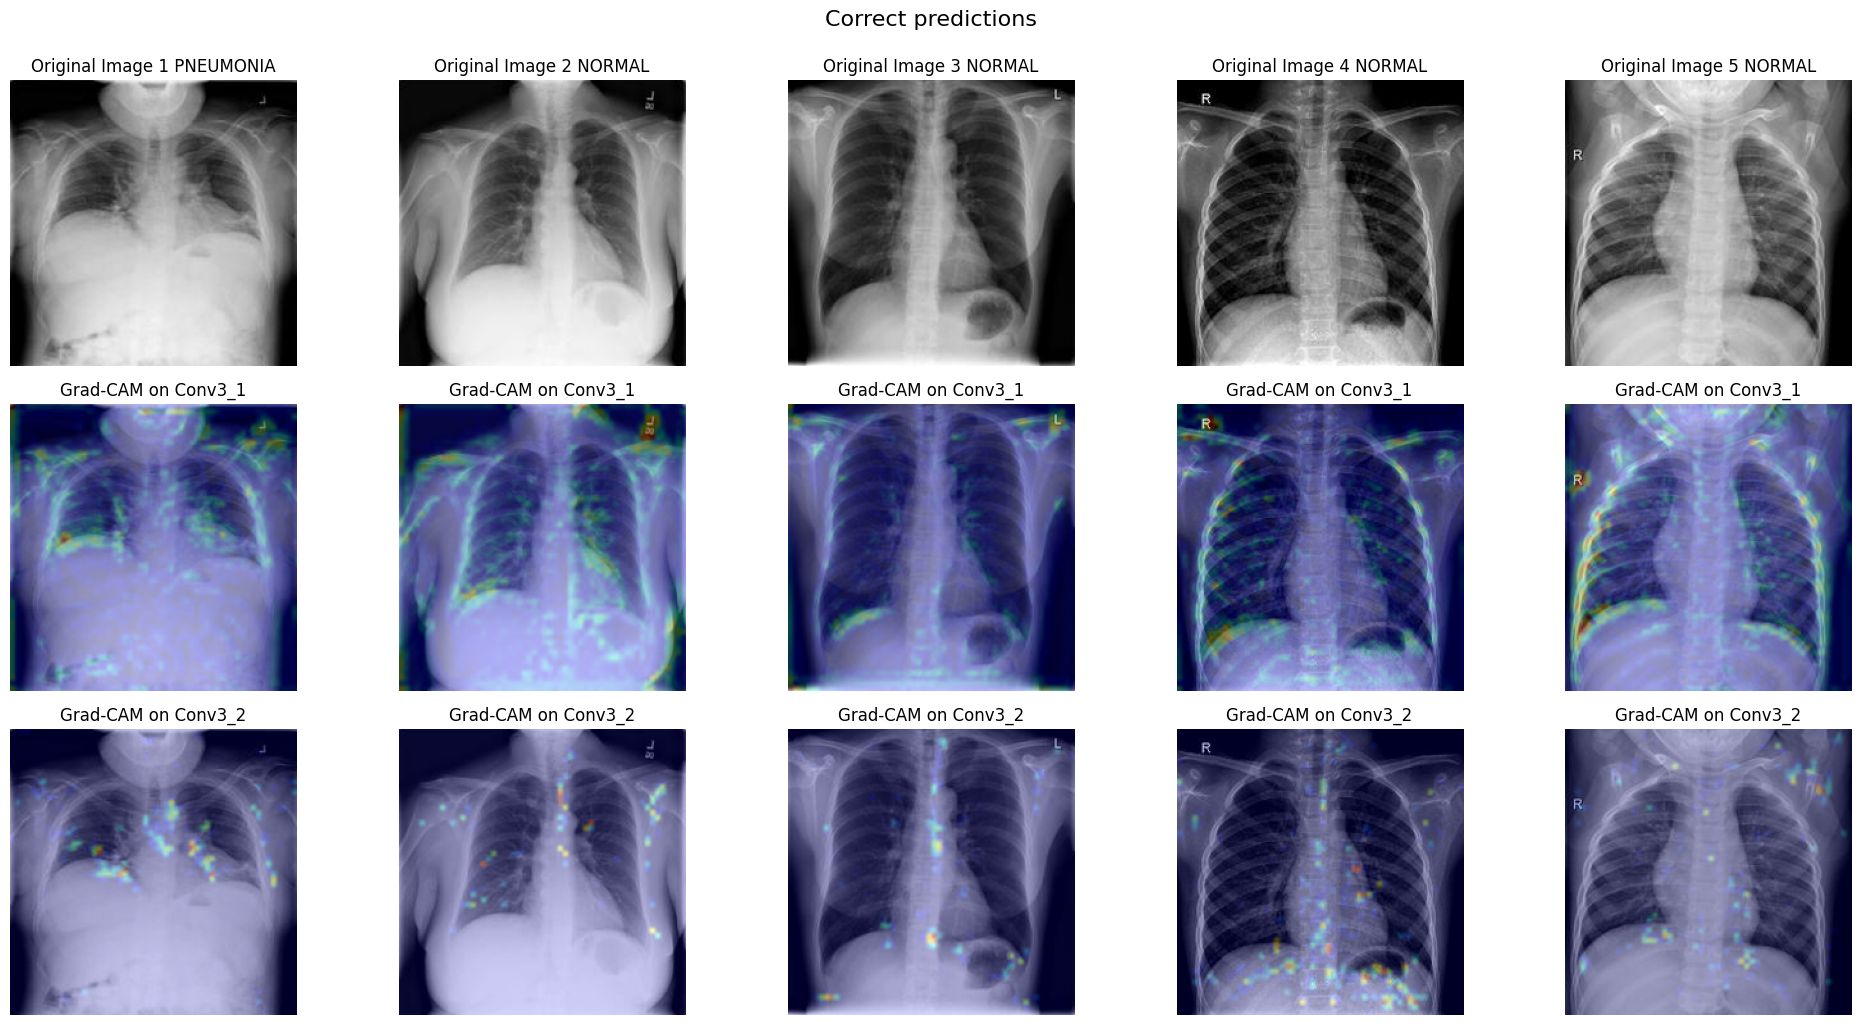

In [6]:
from tensorflow.keras.applications.vgg19 import preprocess_input
custom_model.layers[-1].activation = None
def display_multiple_gradcam(model, data_gen, class_names, conv_layers, img_size=(224, 224), precomputed_predictions=None):
    """
    Displays Grad-CAM heatmaps for 5 different correctly predicted images, for two specified convolutional layers.

    Parameters:
    model (keras.Model): The trained model used for prediction.
    data_gen (keras.preprocessing.image.DirectoryIterator): The data generator for the test dataset.
    class_names (list): A list containing the class names, e.g., ['PNEUMONIA', 'NORMAL'].
    conv_layers (list): A list of convolutional layer names for Grad-CAM, e.g., ['conv3_2', 'conv3_1'].
    img_size (tuple): The target size for image processing (width, height).
    precomputed_predictions (numpy.ndarray): Precomputed binary predictions that are already flattened and rounded.
    """
    
    def get_correct_prediction_paths(model, data_gen, class_names, num_images=5, precomputed_predictions=None):
        if precomputed_predictions is not None:
            predicted_labels = np.round(precomputed_predictions)
        else:
            predictions = model.predict(data_gen, verbose=1)
            predicted_labels = np.round(predictions).flatten()
        true_labels = data_gen.labels
        file_paths = data_gen.filepaths
        class_indices = {name: data_gen.class_indices[name] for name in class_names}
        correctly_predicted_paths = [
            file_paths[i] for i in range(len(true_labels))
            if any(predicted_labels[i] == true_labels[i] == class_indices[class_name] for class_name in class_names)
        ]
        if len(correctly_predicted_paths) >= num_images:
            return random.sample(correctly_predicted_paths, num_images)
        else:
            return correctly_predicted_paths

    def get_img_array(img_path, size):
        img = keras.utils.load_img(img_path, target_size=size)
        array = keras.utils.img_to_array(img)
        array = np.expand_dims(array, axis=0)
        return array

    def make_gradcam_heatmap(img_array, model, conv_layer_name, pred_index=None):
        grad_model = keras.models.Model(
            model.inputs, [model.get_layer(conv_layer_name).output, model.output]
        )
        with tf.GradientTape() as tape:
            conv_layer_output, preds = grad_model(img_array, training=False)
            if pred_index is None:
                pred_index = tf.argmax(preds[0])
            class_channel = preds[:, pred_index]
        grads = tape.gradient(class_channel, conv_layer_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_layer_output = conv_layer_output[0]
        heatmap = conv_layer_output @ pooled_grads[..., tf.newaxis]
        heatmap = tf.squeeze(heatmap)
        heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
        return heatmap.numpy()

    def save_and_display_gradcam(img, heatmap, alpha=0.4):
        heatmap = np.uint8(255 * heatmap)
        jet = mpl.colormaps["jet"]
        jet_colors = jet(np.arange(256))[:, :3]
        jet_heatmap = jet_colors[heatmap]
        jet_heatmap = keras.utils.array_to_img(jet_heatmap)
        jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
        jet_heatmap = keras.utils.img_to_array(jet_heatmap)
        superimposed_img = jet_heatmap * alpha + img
        superimposed_img = keras.utils.array_to_img(superimposed_img)
        return np.array(superimposed_img)

    img_paths = get_correct_prediction_paths(
        model=model, 
        data_gen=data_gen, 
        class_names=class_names,
        num_images=5,
        precomputed_predictions=precomputed_predictions
    )
    if not img_paths:
        print("No correctly predicted images found.")
        return
    num_images = len(img_paths)
    num_layers = len(conv_layers)
    fig, axs = plt.subplots(num_layers + 1, num_images, figsize=(20, 10))
    fig.suptitle("Correct predictions", fontsize=16, y=1.02)
    
    for i, img_path in enumerate(img_paths):
        img = keras.utils.load_img(img_path)
        img_array = preprocess_input(get_img_array(img_path, size=img_size))
        filename = os.path.basename(img_path)
        category = filename.split()[0]
        axs[0, i].imshow(img)
        axs[0, i].set_title(f"Original Image {i+1} {category}")
        axs[0, i].axis('off')
        
        for j, layer in enumerate(conv_layers):
            heatmap = make_gradcam_heatmap(img_array, model, layer)
            gradcam_img = save_and_display_gradcam(keras.utils.img_to_array(img), heatmap)
            axs[j + 1, i].imshow(gradcam_img)
            axs[j + 1, i].set_title(f"Grad-CAM on {layer}")
            axs[j + 1, i].axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig('Gradcam_correct.png', bbox_inches='tight')
    plt.show()

display_multiple_gradcam(custom_model, test_data_gen, ['PNEUMONIA', 'NORMAL'], ['Conv3_1', 'Conv3_2'], precomputed_predictions=y_pred_ravel)

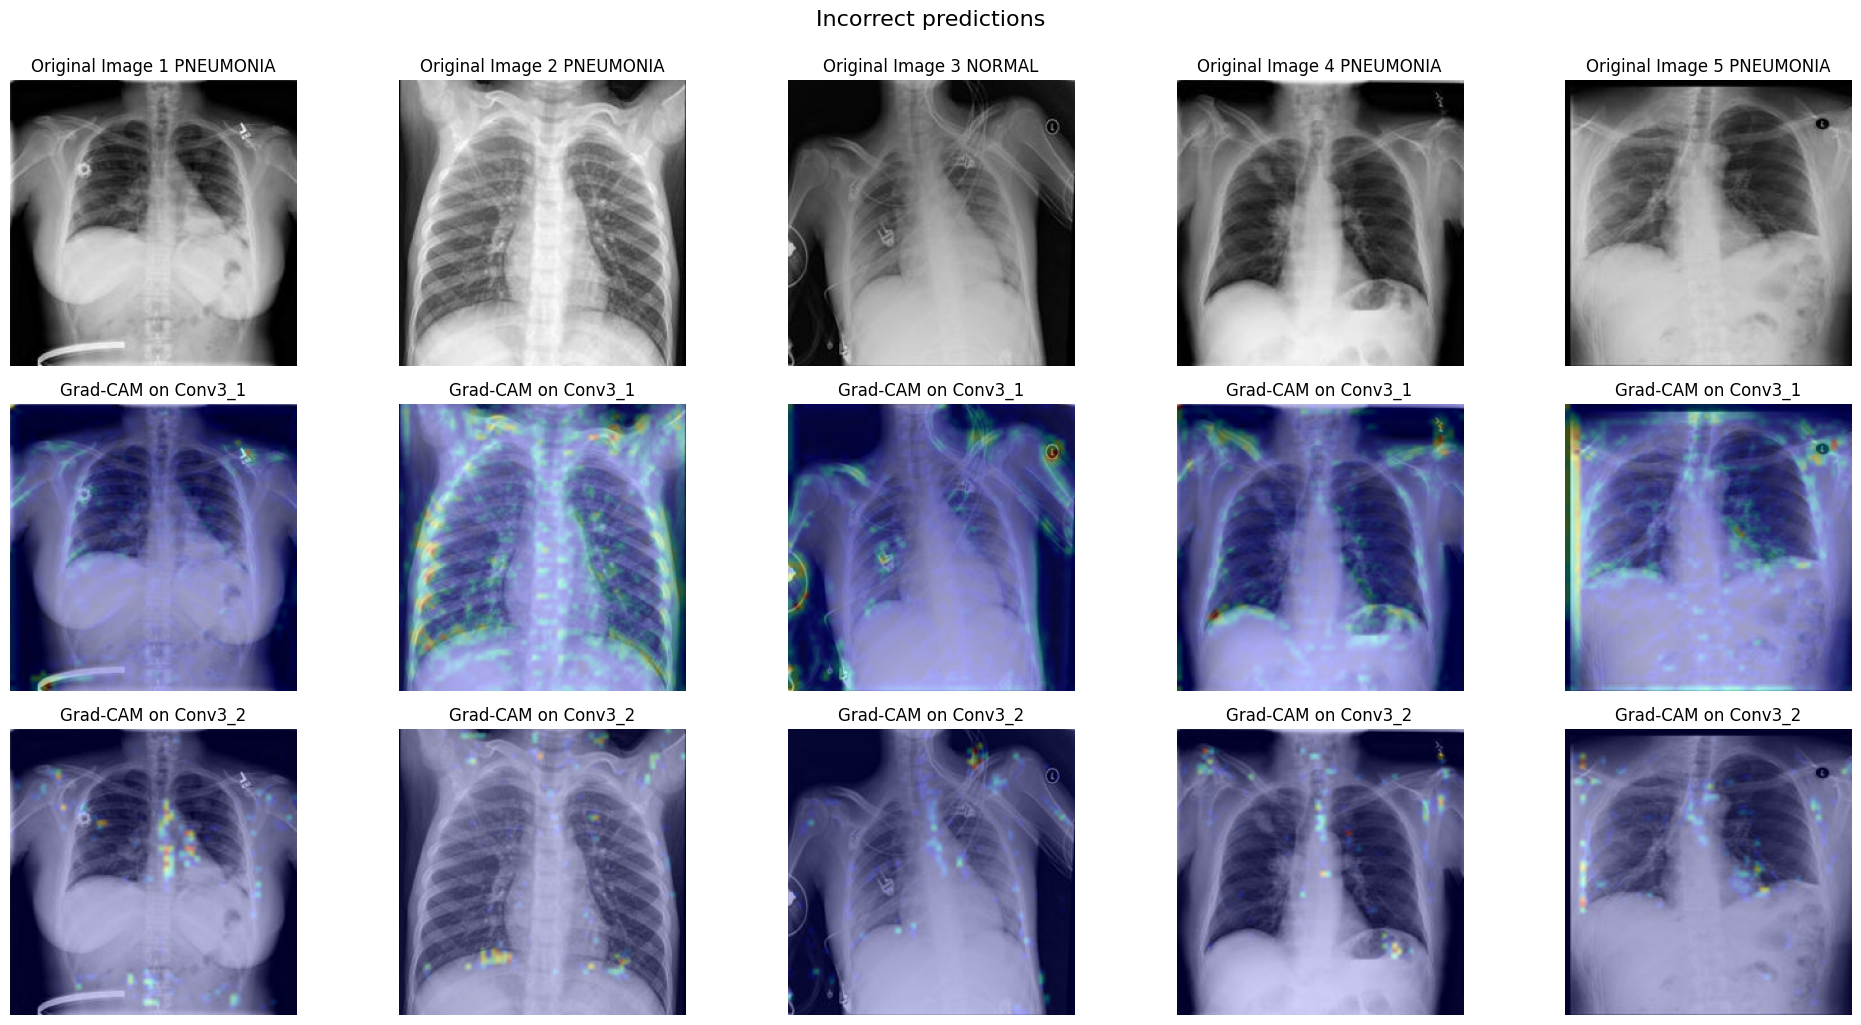

In [7]:
def display_multiple_gradcam(model, data_gen, class_names, conv_layers, img_size=(224, 224), precomputed_predictions=None):
    """
    Displays Grad-CAM heatmaps for 5 different incorrectly predicted images, for two specified convolutional layers.

    Parameters:
    model (keras.Model): The trained model used for prediction.
    data_gen (keras.preprocessing.image.DirectoryIterator): The data generator for the test dataset.
    class_names (list): A list containing the class names, e.g., ['PNEUMONIA', 'NORMAL'].
    conv_layers (list): A list of convolutional layer names for Grad-CAM, e.g., ['conv3_2', 'conv3_1'].
    img_size (tuple): The target size for image processing (width, height).
    precomputed_predictions (numpy.ndarray): Precomputed binary predictions that are already flattened and rounded.
    """

    def get_random_incorrect_prediction_path(model, data_gen, class_names, precomputed_predictions=None):
        if precomputed_predictions is not None:
            predicted_labels = np.round(precomputed_predictions)
        else:
            predictions = model.predict(data_gen, verbose=1)
            predicted_labels = np.round(predictions).flatten()
        true_labels = data_gen.labels
        file_paths = data_gen.filepaths
        incorrectly_predicted_paths = [
            file_paths[i] for i in range(len(true_labels))
            if predicted_labels[i] != true_labels[i]
        ]
        if incorrectly_predicted_paths:
            return random.choice(incorrectly_predicted_paths)
        else:
            return None

    def get_img_array(img_path, size):
        img = keras.utils.load_img(img_path, target_size=size)
        array = keras.utils.img_to_array(img)
        array = np.expand_dims(array, axis=0)
        return array

    def make_gradcam_heatmap(img_array, model, conv_layer_name, pred_index=None):
        grad_model = keras.models.Model(
            model.inputs, [model.get_layer(conv_layer_name).output, model.output]
        )
        with tf.GradientTape() as tape:
            conv_layer_output, preds = grad_model(img_array, training=False)
            if pred_index is None:
                pred_index = tf.argmax(preds[0])
            class_channel = preds[:, pred_index]
        grads = tape.gradient(class_channel, conv_layer_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_layer_output = conv_layer_output[0]
        heatmap = conv_layer_output @ pooled_grads[..., tf.newaxis]
        heatmap = tf.squeeze(heatmap)
        heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
        return heatmap.numpy()

    def save_and_display_gradcam(img, heatmap, alpha=0.4):
        heatmap = np.uint8(255 * heatmap)
        jet = mpl.colormaps["jet"]
        jet_colors = jet(np.arange(256))[:, :3]
        jet_heatmap = jet_colors[heatmap]
        jet_heatmap = keras.utils.array_to_img(jet_heatmap)
        jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
        jet_heatmap = keras.utils.img_to_array(jet_heatmap)
        superimposed_img = jet_heatmap * alpha + img
        superimposed_img = keras.utils.array_to_img(superimposed_img)
        return np.array(superimposed_img)

    img_paths = [
        get_random_incorrect_prediction_path(
            model=model, 
            data_gen=data_gen, 
            class_names=class_names,
            precomputed_predictions=precomputed_predictions
        )
        for _ in range(5)
    ]
    img_paths = [path for path in img_paths if path is not None]

    if not img_paths:
        print("No incorrectly predicted images found.")
        return

    num_images = len(img_paths)
    num_layers = len(conv_layers)
    fig, axs = plt.subplots(num_layers + 1, num_images, figsize=(20, 10))
    fig.suptitle("Incorrect predictions", fontsize=16, y=1.02)
    
    for i, img_path in enumerate(img_paths):
        img = keras.utils.load_img(img_path)
        img_array = preprocess_input(get_img_array(img_path, size=img_size))
        filename = os.path.basename(img_path)
        category = filename.split()[0]
        axs[0, i].imshow(img)
        axs[0, i].set_title(f"Original Image {i+1} {category}")
        axs[0, i].axis('off')
        
        for j, layer in enumerate(conv_layers):
            heatmap = make_gradcam_heatmap(img_array, model, layer)
            gradcam_img = save_and_display_gradcam(keras.utils.img_to_array(img), heatmap)
            axs[j + 1, i].imshow(gradcam_img)
            axs[j + 1, i].set_title(f"Grad-CAM on {layer}")
            axs[j + 1, i].axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig('Gradcam_incorrect.png', bbox_inches='tight')
    plt.show()

display_multiple_gradcam(custom_model, test_data_gen, ['PNEUMONIA', 'NORMAL'], ['Conv3_1', 'Conv3_2'], precomputed_predictions=y_pred_ravel)

Finished creating Confusion_Matrix


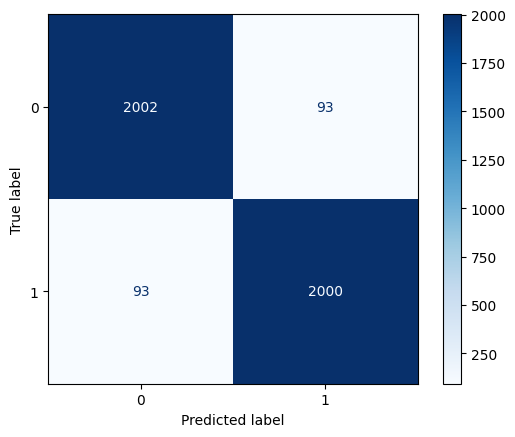

In [8]:
y_pred = (y_pred_ravel > 0.35).astype(int)

# Compute confusion matrix
cm = confusion_matrix(test_classes, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.savefig('Confusion_Matrix_35.png', bbox_inches='tight')
print("Finished creating Confusion_Matrix")